# Visualizing the Calories Burnt Prediction Dataset

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import boxcox
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


## Import Liberaries


In [20]:
df = pd.read_csv('/content/calories.csv')

df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


# Data Preprocessing

In [21]:
# Checking for missing values
print(df.isnull().sum())

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64


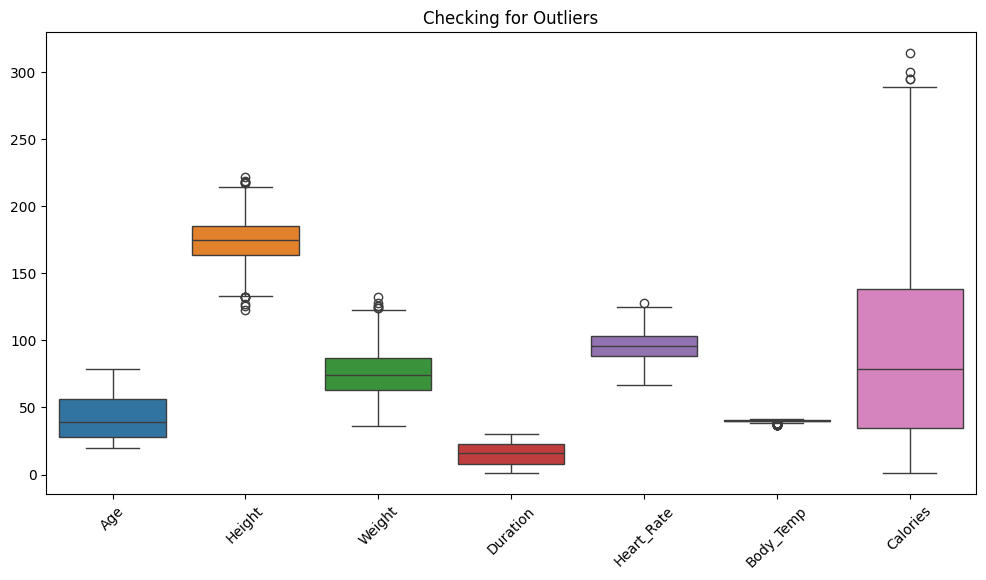

In [22]:
# Boxplot Construction to detect outliers

plt.figure(figsize=(12,6))

sns.boxplot(data=df[['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']])
plt.xticks(rotation=45)
plt.title("Checking for Outliers")
plt.show()

In [23]:
# Displaying the min and max values for all columns
print(df[['Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']].describe())

             Height        Weight      Duration    Heart_Rate     Body_Temp  \
count  15000.000000  15000.000000  15000.000000  15000.000000  15000.000000   
mean     174.465133     74.966867     15.530600     95.518533     40.025453   
std       14.258114     15.035657      8.319203      9.583328      0.779230   
min      123.000000     36.000000      1.000000     67.000000     37.100000   
25%      164.000000     63.000000      8.000000     88.000000     39.600000   
50%      175.000000     74.000000     16.000000     96.000000     40.200000   
75%      185.000000     87.000000     23.000000    103.000000     40.600000   
max      222.000000    132.000000     30.000000    128.000000     41.500000   

           Calories  
count  15000.000000  
mean      89.539533  
std       62.456978  
min        1.000000  
25%       35.000000  
50%       79.000000  
75%      138.000000  
max      314.000000  


*We decide to keep these values as no extreme values of all features seem unrealistic*

In [24]:
# Convert 'Gender' to numerical values (Male = 1, Female = 0)
df['Gender'] = df['Gender'].map({'male': 1, 'female': 0})

In [25]:
# Checking Skewness in data


skewed_features = df[['Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']].skew()
print(skewed_features)

Height       -0.006190
Weight        0.226725
Duration      0.004751
Heart_Rate   -0.010704
Body_Temp    -0.994382
Calories      0.505371
dtype: float64


In [26]:
from sklearn.preprocessing import MinMaxScaler

num_cols = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']
scaler = MinMaxScaler()

# Applying Min-Max Scaling
df[num_cols] = scaler.fit_transform(df[num_cols])

df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,0.813559,0.676768,0.604167,0.965517,0.622951,0.840909,0.734824
1,14861698,0,0.000000,0.434343,0.250000,0.448276,0.442623,0.727273,0.207668
2,11179863,1,0.830508,0.565657,0.447917,0.137931,0.344262,0.363636,0.079872
3,16180408,0,0.237288,0.565657,0.364583,0.413793,0.540984,0.772727,0.223642
4,17771927,0,0.118644,0.313131,0.229167,0.310345,0.229508,0.613636,0.108626


# Exploratory Data Analysis

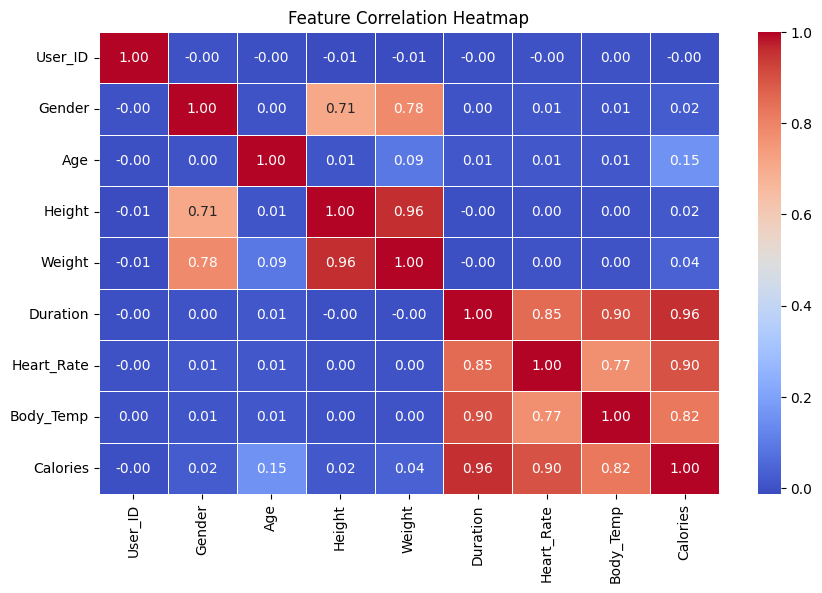

In [27]:
# Computing the correlation matrix
corr_matrix = df.corr()

# Plotting heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [28]:
# Drop unnecessary columns, Height is highly correlated with Weight at 0.96
df = df.drop(columns=['User_ID', 'Height'])

# Display the updated dataframe
print(df.head())

   Gender       Age    Weight  Duration  Heart_Rate  Body_Temp  Calories
0       1  0.813559  0.604167  0.965517    0.622951   0.840909  0.734824
1       0  0.000000  0.250000  0.448276    0.442623   0.727273  0.207668
2       1  0.830508  0.447917  0.137931    0.344262   0.363636  0.079872
3       0  0.237288  0.364583  0.413793    0.540984   0.772727  0.223642
4       0  0.118644  0.229167  0.310345    0.229508   0.613636  0.108626


# Model Training and Evaluation

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Splitting data (80% Train, 20% Test)
X = df.drop(columns=['Calories'])  # Features
y = df['Calories']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models Dictionary
models = {
    'Linear Regression': LinearRegression()
}

# Training & Evaluating Models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)  # Train
    y_pred = model.predict(X_test)  # Predict

    r2 = r2_score(y_test, y_pred)  # R² Score
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # RMSE
    results[name] = {'R² Score': r2, 'RMSE': rmse}

# Display Results
for model, metrics in results.items():
    print(f"{model}: R² Score = {metrics['R² Score']:.4f}, RMSE = {metrics['RMSE']:.4f}")

Linear Regression: R² Score = 0.9671, RMSE = 0.0368
